In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import xgboost as xgb

### Carregando os dados

In [2]:
# Defina as credenciais do banco de dados
server = 'cbarbosa.database.windows.net'
database = 'SQLBI'
table = 'dbo.base_completa'
username = 'cbarbosa'
password = 'impacta@2024'

In [3]:
# Crie a string de conexão
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'

# Crie o engine
engine = create_engine(connection_string)

# Carregue os dados da tabela SQL para um DataFrame
query = 'SELECT * FROM base_completa'
db_evasao = pd.read_sql(query, engine)

### Visualizando os dados importados

In [4]:
db_evasao.head()

,ANO_LETIVO,MES_REFERENCIA,DATA_REFERENCIA,TOTAL_ALUNOS_MATRICULADOS,TOTAL_ALUNOS_EVADIRAM,TOTAL_ALUNOS_MASCULINOS_EVADIRAM,TOTAL_ALUNOS_FEMININOS_EVADIRAM,TAXA_EVASAO_PERCENTUAL_DO_TOTAL,IDADE_MEDIA_ESTUDANTES,TOTAL_ALUNOS_GENERO_MASCULINO,...,NIVEL_SOCIOECONOMICO,OCUPACAO_PAIS_RESPONSAVEIS,PROGRAMAS_SUPORTE,EFICACIA_PROGRAMAS_SUPORTE_NA_EVASAO,TAXA_EVASAO_PERCENTUAL_OUTRAS_UNIVERSIDADES,PRECENTUAL_RETORNO_A_UNIVERSIDADE,PERSPECTIVA_POS_EVASAO,PERCENTUAL_ALUNO_COM_APOIO_PSICOLOGICO,PERCENTUAL_ALUNOS_COM_ACESSO_A_INTERNET,QUALIDADE_INSTALACOES_UNIVERSIDADE
0,2020,Janeiro,2020-01-01,2744,272,91,181,0.10,32,920,...,Classe A,Executivos,Acompanhamento Academico,Nao,0.17,0.20,Positiva,0.65,0.87,Regular
1,2020,Fevereiro,2020-02-01,2472,191,96,95,0.08,23,916,...,Classe D,Empresarios,Acompanhamento Academico,Sim,0.11,0.26,Neutra,0.65,0.77,Regular
2,2020,Mar�o,2020-03-01,2281,158,84,74,0.07,33,968,...,Classe C,Executivos,Programa de Reforco Academico,Nao,0.24,0.20,Negativa,0.65,0.85,Boa
3,2020,Abril,2020-04-01,2123,268,100,168,0.13,26,954,...,Classe B,Trabalhadores,Programa de Tutoria,Sim,0.42,0.18,Positiva,0.41,0.72,Boa
4,2020,Maio,2020-05-01,1855,159,91,68,0.09,19,953,...,Classe B,Trabalhadores,Orientacao Profissional,Nao,0.37,0.23,Positiva,0.66,0.77,Excelente


In [125]:
db_evasao.shape

(1260, 26)

In [79]:
print(max(db_evasao['TAXA_EVASAO_PERCENTUAL_DO_TOTAL']))

0.36


In [120]:
db_max = db_evasao[db_evasao['TAXA_EVASAO_PERCENTUAL_DO_TOTAL'] == 0.36]
colunas = ['TOTAL_ALUNOS_MATRICULADOS', 'IDADE_MEDIA_ESTUDANTES', 'MEDIA_NOTAS_DESEMPENHO_ACADEMICO', 'HISTORICO_MEDIO_PERCENTUAL_FREQUENCIA', 'PERCENTUAL_ALUNO_COM_APOIO_PSICOLOGICO', 'PERCENTUAL_ALUNOS_COM_ACESSO_A_INTERNET']
db_max = db_max.loc[:, colunas]

print(db_max.head())

# 809, 22, 7.86, 0.76, 0.46, 0.78
# 774, 24, 7.72, 0,76, 0,46, 0,81

     TOTAL_ALUNOS_MATRICULADOS  IDADE_MEDIA_ESTUDANTES  \
644                        809                      22   
655                        774                      24   

     MEDIA_NOTAS_DESEMPENHO_ACADEMICO  HISTORICO_MEDIO_PERCENTUAL_FREQUENCIA  \
644                              7.86                                   0.76   
655                              7.72                                   0.76   

     PERCENTUAL_ALUNO_COM_APOIO_PSICOLOGICO  \
644                                    0.46   
655                                    0.46   

     PERCENTUAL_ALUNOS_COM_ACESSO_A_INTERNET  
644                                     0.78  
655                                     0.81  


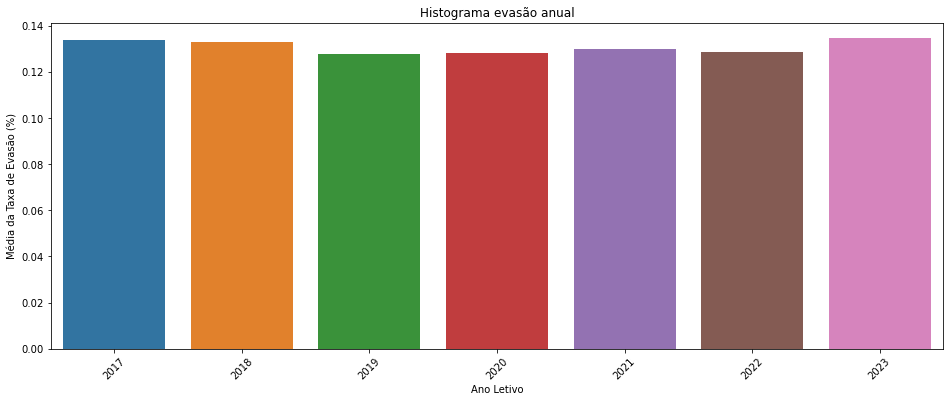

In [5]:
plt.figure(figsize=(16,6))
media_evasao = db_evasao.groupby('ANO_LETIVO')['TAXA_EVASAO_PERCENTUAL_DO_TOTAL'].mean().reset_index()

# Plotando os dados
sns.barplot(data=media_evasao, x='ANO_LETIVO', y='TAXA_EVASAO_PERCENTUAL_DO_TOTAL')
plt.title("Histograma evasão anual")
plt.xlabel("Ano Letivo")
plt.ylabel("Média da Taxa de Evasão (%)")
plt.xticks(rotation=45)
plt.show()

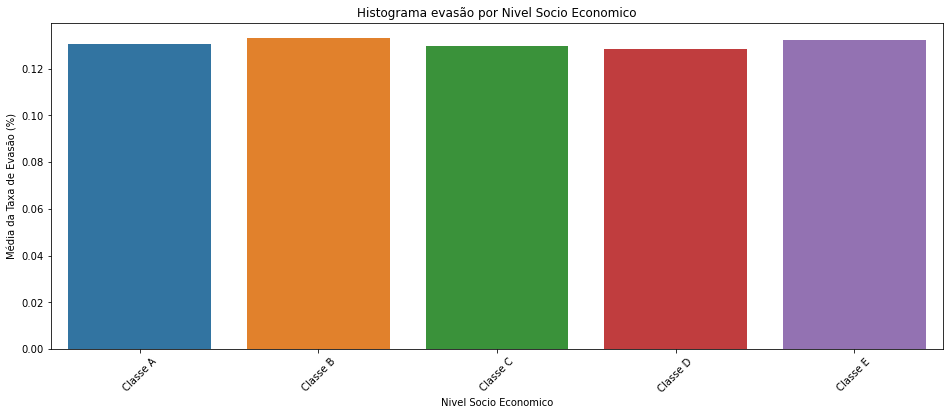

In [6]:
plt.figure(figsize=(16,6))
media_evasao = db_evasao.groupby('NIVEL_SOCIOECONOMICO')['TAXA_EVASAO_PERCENTUAL_DO_TOTAL'].mean().reset_index()

# Plotando os dados
sns.barplot(data=media_evasao, x='NIVEL_SOCIOECONOMICO', y='TAXA_EVASAO_PERCENTUAL_DO_TOTAL')
plt.title("Histograma evasão por Nivel Socio Economico")
plt.xlabel("Nivel Socio Economico")
plt.ylabel("Média da Taxa de Evasão (%)")
plt.xticks(rotation=45)
plt.show()

### Mapa de Calor para visualizar as melhores correlações

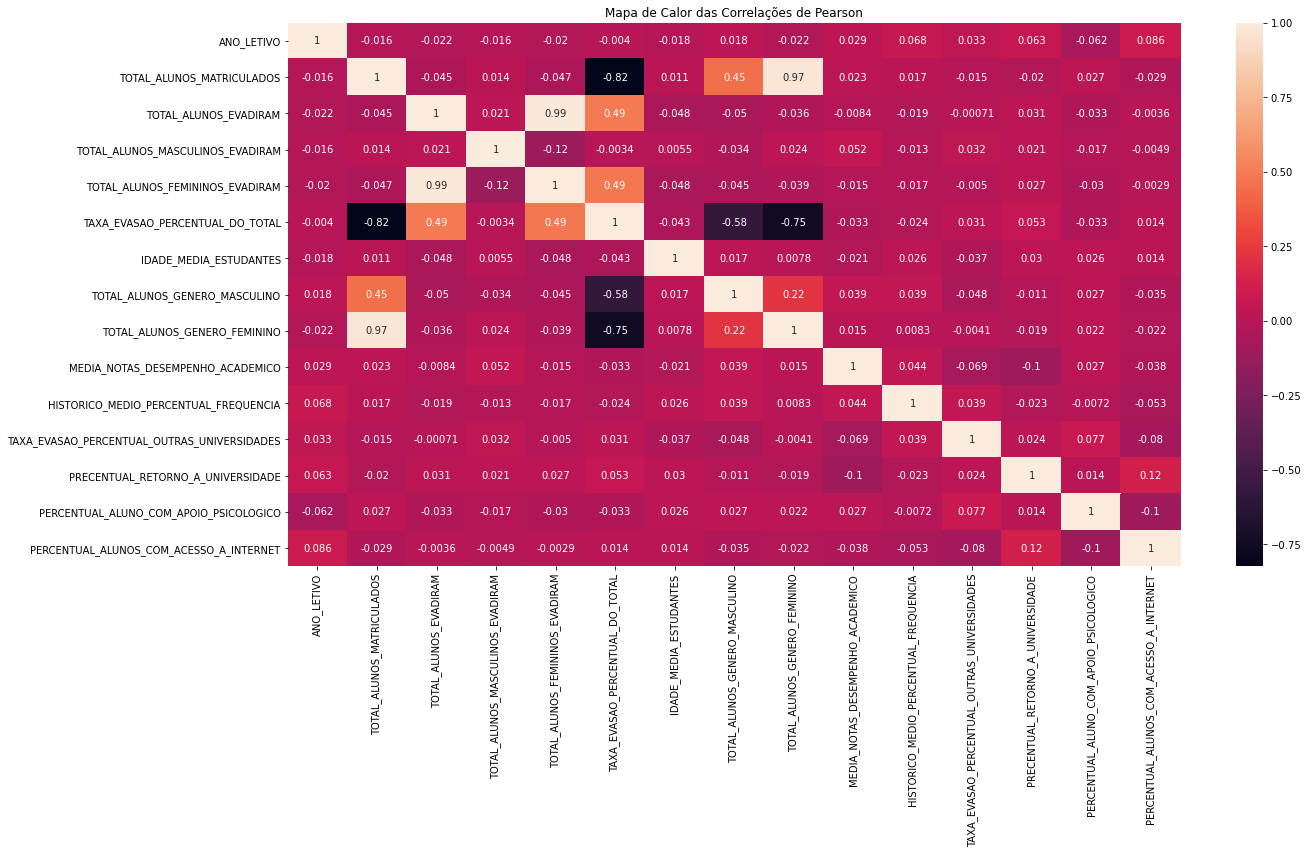

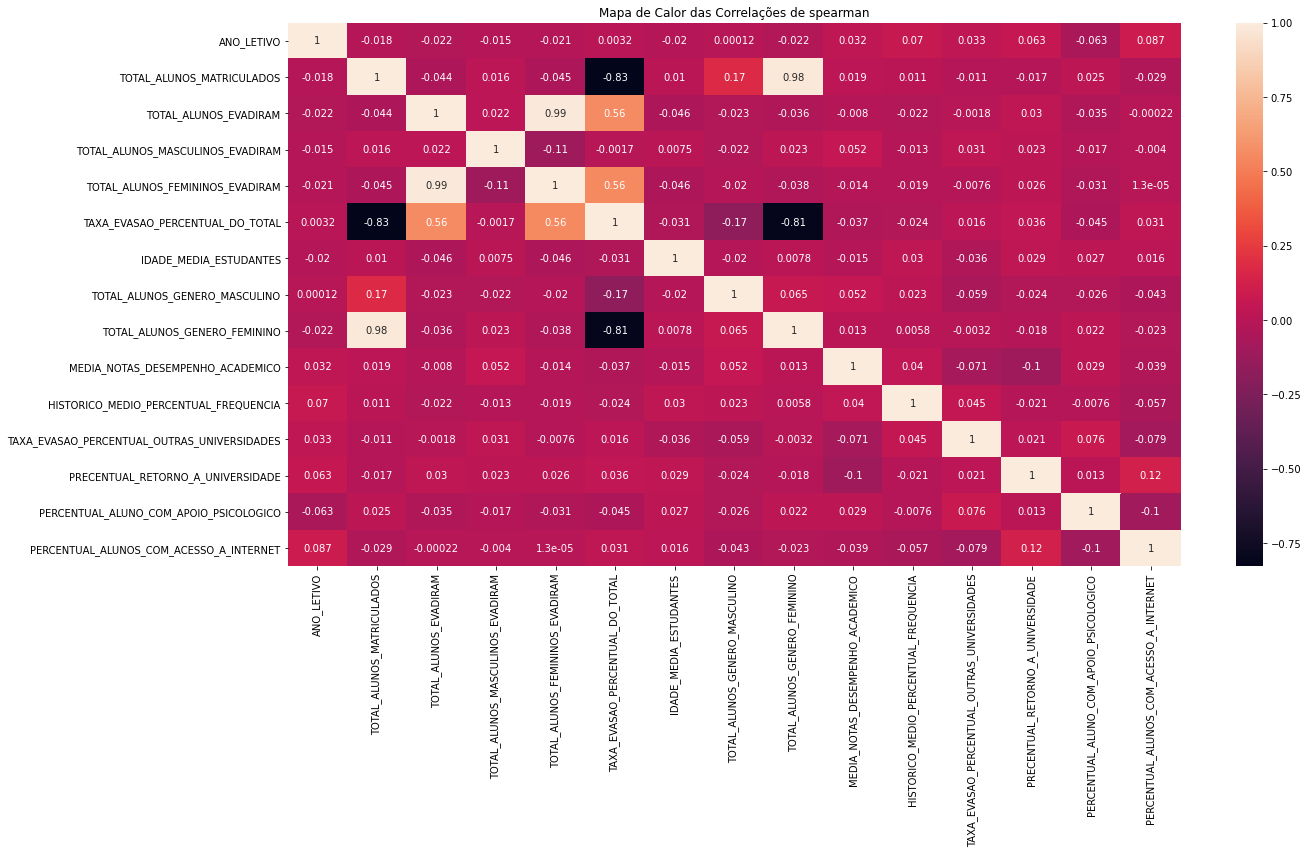

In [7]:
corr_pearson = db_evasao.corr(method='pearson')
corr_spearman = db_evasao.corr(method='spearman')

plt.figure(figsize=(20, 10))
sns.heatmap(corr_pearson, annot=True)
plt.title('Mapa de Calor das Correlações de Pearson')
plt.show()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_spearman, annot=True)
plt.title('Mapa de Calor das Correlações de spearman')
plt.show()


In [8]:
# Visualizando todas as colunas existentes
db_evasao.columns

Index(['ANO_LETIVO', 'MES_REFERENCIA', 'DATA_REFERENCIA',
       'TOTAL_ALUNOS_MATRICULADOS', 'TOTAL_ALUNOS_EVADIRAM',
       'TOTAL_ALUNOS_MASCULINOS_EVADIRAM', 'TOTAL_ALUNOS_FEMININOS_EVADIRAM',
       'TAXA_EVASAO_PERCENTUAL_DO_TOTAL', 'IDADE_MEDIA_ESTUDANTES',
       'TOTAL_ALUNOS_GENERO_MASCULINO', 'TOTAL_ALUNOS_GENERO_FEMININO',
       'REGIAO_GEOGRAFICA', 'MODALIDADE', 'MAIOR_MOTIVO_DAS_EVASOES',
       'MEDIA_NOTAS_DESEMPENHO_ACADEMICO',
       'HISTORICO_MEDIO_PERCENTUAL_FREQUENCIA', 'NIVEL_SOCIOECONOMICO',
       'OCUPACAO_PAIS_RESPONSAVEIS', 'PROGRAMAS_SUPORTE',
       'EFICACIA_PROGRAMAS_SUPORTE_NA_EVASAO',
       'TAXA_EVASAO_PERCENTUAL_OUTRAS_UNIVERSIDADES',
       'PRECENTUAL_RETORNO_A_UNIVERSIDADE', 'PERSPECTIVA_POS_EVASAO',
       'PERCENTUAL_ALUNO_COM_APOIO_PSICOLOGICO',
       'PERCENTUAL_ALUNOS_COM_ACESSO_A_INTERNET',
       'QUALIDADE_INSTALACOES_UNIVERSIDADE'],
      dtype='object')

### Separando os dados para efetuar os modelos de Regreção

In [9]:
# Criando os dados a serem comparados
# 

evasao_features = [ 'TOTAL_ALUNOS_MATRICULADOS','IDADE_MEDIA_ESTUDANTES', 'MODALIDADE', 'MAIOR_MOTIVO_DAS_EVASOES','MEDIA_NOTAS_DESEMPENHO_ACADEMICO','HISTORICO_MEDIO_PERCENTUAL_FREQUENCIA', 'NIVEL_SOCIOECONOMICO','PERCENTUAL_ALUNO_COM_APOIO_PSICOLOGICO',
       'PERCENTUAL_ALUNOS_COM_ACESSO_A_INTERNET','QUALIDADE_INSTALACOES_UNIVERSIDADE']
x = db_evasao[evasao_features]
x.head()

,TOTAL_ALUNOS_MATRICULADOS,IDADE_MEDIA_ESTUDANTES,MODALIDADE,MAIOR_MOTIVO_DAS_EVASOES,MEDIA_NOTAS_DESEMPENHO_ACADEMICO,HISTORICO_MEDIO_PERCENTUAL_FREQUENCIA,NIVEL_SOCIOECONOMICO,PERCENTUAL_ALUNO_COM_APOIO_PSICOLOGICO,PERCENTUAL_ALUNOS_COM_ACESSO_A_INTERNET,QUALIDADE_INSTALACOES_UNIVERSIDADE
0,2744,32,Presencial,Dificuldade em Conciliar Trabalho e Estudo,6.60,0.89,Classe A,0.65,0.87,Regular
1,2472,23,Presencial,Falta de Apio Emocional,9.46,0.79,Classe D,0.65,0.77,Regular
2,2281,33,Presencial,Problemas Familiares,7.89,0.74,Classe C,0.65,0.85,Boa
3,2123,26,Presencial,Dificuldade em Conciliar Trabalho e Estudo,8.80,0.81,Classe B,0.41,0.72,Boa
4,1855,19,Presencial,Dificuldades Financeiras,7.95,0.75,Classe B,0.66,0.77,Excelente


In [10]:
# Separando o resultado
y = db_evasao.TAXA_EVASAO_PERCENTUAL_DO_TOTAL
y.head()

0    0.10
1    0.08
2    0.07
3    0.13
4    0.09
Name: TAXA_EVASAO_PERCENTUAL_DO_TOTAL, dtype: float64

In [11]:
evasao_features = [ 'TOTAL_ALUNOS_MATRICULADOS','IDADE_MEDIA_ESTUDANTES','MEDIA_NOTAS_DESEMPENHO_ACADEMICO','HISTORICO_MEDIO_PERCENTUAL_FREQUENCIA','PERCENTUAL_ALUNO_COM_APOIO_PSICOLOGICO',
       'PERCENTUAL_ALUNOS_COM_ACESSO_A_INTERNET']
x1 = db_evasao[evasao_features]
x1.head()

,TOTAL_ALUNOS_MATRICULADOS,IDADE_MEDIA_ESTUDANTES,MEDIA_NOTAS_DESEMPENHO_ACADEMICO,HISTORICO_MEDIO_PERCENTUAL_FREQUENCIA,PERCENTUAL_ALUNO_COM_APOIO_PSICOLOGICO,PERCENTUAL_ALUNOS_COM_ACESSO_A_INTERNET
0,2744,32,6.60,0.89,0.65,0.87
1,2472,23,9.46,0.79,0.65,0.77
2,2281,33,7.89,0.74,0.65,0.85
3,2123,26,8.80,0.81,0.41,0.72
4,1855,19,7.95,0.75,0.66,0.77


In [ ]:
2500, 25, 7.2, 0.95, 0.5, 0.6

In [137]:
#Treinando o Modelo de arvore de Regressão

X_evasao_train, X_evasao_test, y_evasao_train, y_evasao_test = train_test_split(x1, y, test_size=0.3, random_state=1)

evasao_model = DecisionTreeRegressor(max_depth=6,random_state=1)

evasao_model.fit(X_evasao_train, y_evasao_train)

DecisionTreeRegressor(max_depth=6, random_state=1)

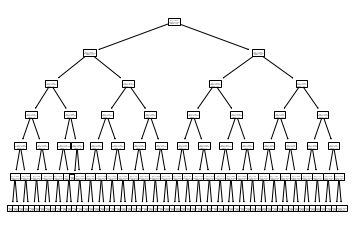

In [138]:
_ = plot_tree(evasao_model)

In [131]:
evasao_model_linear = LinearRegression()

evasao_model_linear.fit(X_evasao_train, y_evasao_train)

LinearRegression()

### Comparação dos Modelos

In [139]:
y_pred_arvore_regressao = evasao_model.predict(X_evasao_train)
y_pred_regressao_linear = evasao_model_linear.predict(X_evasao_train)

RMSE_arvore_regressao = mean_squared_error(y_evasao_train, y_pred_arvore_regressao, squared=False)
RMSE_regressao_linear = mean_squared_error(y_evasao_train, y_pred_regressao_linear, squared=False)

print(f"RMSE da arvore de regressao eh {RMSE_arvore_regressao:.2f}, enquanto da regressao linear {RMSE_regressao_linear:.2f}")

RMSE da arvore de regressao eh 0.02, enquanto da regressao linear 0.03


### Executando uma Previsão

In [140]:
y_pred_arvore_regressao = evasao_model.predict(X_evasao_train)
y_pred_regressao_linear = evasao_model_linear.predict(X_evasao_train)

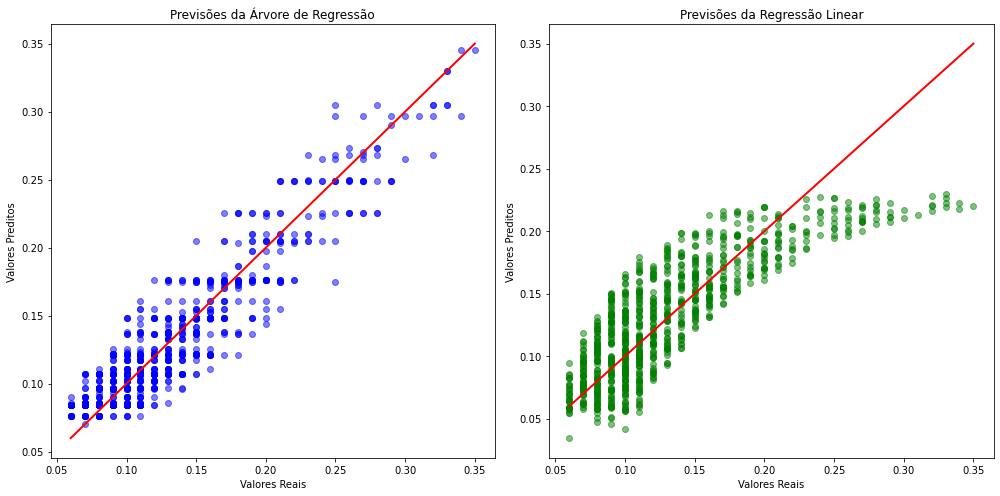

In [142]:
# Plotando os resultados
plt.figure(figsize=(14, 7))

# Resultados da árvore de regressão
plt.subplot(1, 2, 1)
plt.scatter(y_evasao_train, y_pred_arvore_regressao, color='blue', alpha=0.5)
plt.plot([min(y_evasao_train), max(y_evasao_train)], [min(y_evasao_train), max(y_evasao_train)], color='red', linewidth=2)
plt.title('Previsões da Árvore de Regressão')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')

# Resultados da regressão linear
plt.subplot(1, 2, 2)
plt.scatter(y_evasao_train, y_pred_regressao_linear, color='green', alpha=0.5)
plt.plot([min(y_evasao_train), max(y_evasao_train)], [min(y_evasao_train), max(y_evasao_train)], color='red', linewidth=2)
plt.title('Previsões da Regressão Linear')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')

plt.tight_layout()
plt.show()

In [144]:
# Valor a ser testado
colunas = X_evasao_train.columns
# 'TOTAL_ALUNOS_MATRICULADOS','IDADE_MEDIA_ESTUDANTES','MEDIA_NOTAS_DESEMPENHO_ACADEMICO','HISTORICO_MEDIO_PERCENTUAL_FREQUENCIA','PERCENTUAL_ALUNO_COM_APOIO_PSICOLOGICO','PERCENTUAL_ALUNOS_COM_ACESSO_A_INTERNET']
valores = np.array([[774, 24, 7.72, 0.76, 0.46, 0.81]])
valores_df = pd.DataFrame(valores, columns=colunas)

# Executando a previsão
previsao = evasao_model.predict(valores_df)
previsao_linear = evasao_model_linear.predict(valores_df)

print(previsao)
print(previsao_linear)

# 809, 22, 7.86, 0.76, 0.46, 0.78
# 774, 24, 7.72, 0.76, 0.46, 0.81


[0.345]
[0.22661388]


#### para esta combinação atingimos o mernor % de evasão - 2500, 20, 9.8, 0.95, 0.95, 0.95 - resultado 7%
#### alterando para esta situação temos o maior nivel de evasão - 500, 20, 7, 0.5, 0.6, 0.7 - resultado 34%